In [4]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output
import time
import copy

In [7]:
sigm = lambda x: 1/(1+np.exp(-x))

class Layer:


    def __init__(self,NC,NN,ActFun,rate=0.1):

        self.NC = NC
        self.NN = NN
        self.ActFunc = ActFun
        self.rate = rate

        self.W = np.random.uniform( -10.,10.,(self.NC,self.NN) )
        self.b = np.random.uniform( -10.,10.,(1,self.NN) )

    def Activation(self,x):
        z = np.dot(x,self.W) + self.b
        return self.ActFunc( z )[0]

    def Mutate(self):



        self.W += np.random.uniform( -self.rate, self.rate, size=(self.NC,self.NN))
        self.b += np.random.uniform( -self.rate, self.rate, size=(1,self.NN))

def GetBrain():
    l0 = Layer(1,5,sigm)
    l1 = Layer(5,1,sigm)

    Brain = [l0,l1]
    return Brain



In [8]:
class Robot:

    def __init__(self, dt, Layers, Id=0):

        self.Id = Id
        self.dt = dt


        self.r = np.random.uniform([0.,0.])
        theta = 0.
        self.v = np.array([1.*np.cos(theta),1.*np.sin(theta)])


        self.Fitness = np.inf
        self.Steps = 0


        self.Layers = Layers

    def GetR(self):
        return self.r

    def Evolution(self):
        self.r += self.v*self.dt


    def Reset(self):
        self.Steps = 0.
        self.r = np.array([0.,0.])
        self.Fitness = np.inf


    def SetFitness(self):
        self.Fitness = 1/(self.Steps)



    def BrainActivation(self,x,threshold=0.75):



        for i in range(len(self.Layers)):
            if i == 0:
                output = self.Layers[i].Activation(x)
            else:
                output = self.Layers[i].Activation(output)

        self.Activation = np.round(output,4)


        if self.Activation[0] > threshold:
            self.v = -self.v
            self.Steps -=0.8

            # Deberias penalizar de alguna forma, dado que mucha activación es desgastante!
            # Para cualquier cerebro

        return self.Activation

    def Mutate(self):
        for i in range(len(self.Layers)):
            self.Layers[i].Mutate()

    def GetBrain(self):
        return self.Layers

def GetRobots(N):

    Robots = []

    for i in range(N):

        Brain = GetBrain()
        r = Robot(dt,Brain,Id=i)
        Robots.append(r)

    return Robots

dt = 0.1
t = np.arange(0.,5.,dt)
Robots = GetRobots(200)

def GetPlot():

    fig = plt.figure(figsize=(8,4))
    ax = fig.add_subplot(1,2,1)
    ax1 = fig.add_subplot(1,2,2)

    ax.set_xlim(-1.,1.)
    ax.set_ylim(-1.,1.)

    return ax,ax1



In [9]:
def TimeEvolution(Robots,e,Plot=True):


    for it in range(t.shape[0]):

        if Plot:

            clear_output(wait=True)

            ax,ax1 = GetPlot()
            ax1.set_ylim(0.,1.)

            ax.set_title('t = {:.3f}'.format(t[it]))

        Activation = np.zeros(len(Robots))

        for i,p in enumerate(Robots):
            p.Evolution()


            Act = p.BrainActivation(p.GetR()[0])
            Activation[i] = Act


            if -1 < (p.GetR()[0]) <1:
              p.Steps+=1


            if Plot and i < 5:
                ax.scatter(p.r[0],p.r[1],label='Id: {}, Steps: {:.0f}'.format(p.Id,p.Steps))
                ax.quiver(p.r[0],p.r[1],p.v[0],p.v[1])



        if Plot:
            ax1.plot(np.arange(0,len(Robots[:5]),1),Activation[:5],marker='o',color='b',label='Activation')
            ax1.axhline(y=0.7,color='r')

        if Plot:

            ax.legend(loc=0)
            ax1.legend(loc=0)
            plt.show()
            time.sleep(0.001)

Epoch: 49
Last Fitness: 0.021008403361344536


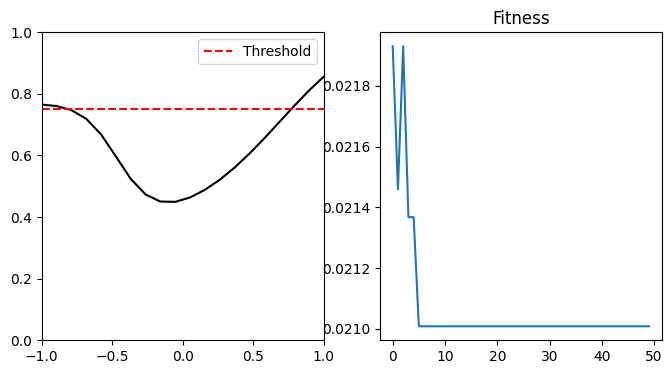

In [11]:

def Genetic(Robots, epochs = 50, Plot = True, Plottime=False):


    N = int(0.5*len(Robots))

    FitVector = np.array([])


    x = np.linspace(-1,1,20)
    Act = np.zeros_like(x)

    for e in range(int(epochs)):



        for p in Robots:
            p.Reset()
            p.Mutate()


        TimeEvolution(Robots,e,Plottime)


        for i,p in enumerate(Robots):
            p.SetFitness()


        scores = [(p.Fitness,p) for p in Robots]
        scores.sort(key = lambda x: x[0], reverse = False)

        Temp = [r[1] for i,r in enumerate(scores) if i < N]
        for i,r in enumerate(Robots):
            j = i%N
            Robots[i] = copy.deepcopy(Temp[j])

        best_fitness = scores[0][0]
        best_bot = scores[0][1]

        FitVector = np.append(FitVector,best_fitness)

        for i in range(len(x)):
            Act[i] = best_bot.BrainActivation(x[i])

        clear_output(wait=True)

        print('Epoch:', e)


        print('Last Fitness:', FitVector[-1])


        if Plot:

            ax,ax1 = GetPlot()
            ax.plot(x,Act,color='k')
            ax.set_ylim(0.,1)
            ax.axhline(y=0.75,ls='--',color='r',label='Threshold')

            ax1.set_title('Fitness')
            ax1.plot(FitVector)

            ax.legend(loc=0)

            plt.show()

            time.sleep(0.01)



    return best_bot, FitVector

Robots = GetRobots(200)
#Retire el numeral de la gráfica con True para mostrar el bot
#Best, FitVector = Genetic(Robots,Plot=True,Plottime=True)

#Gráfica que muestra el fitness en función de la época
Best, FitVector = Genetic(Robots,Plot=True,Plottime=False)


